In [5]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


C:\Users\Windows\AppData\Local\Temp\ipykernel_10964\1355440455.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,y = wavfile.read('teste.wav')


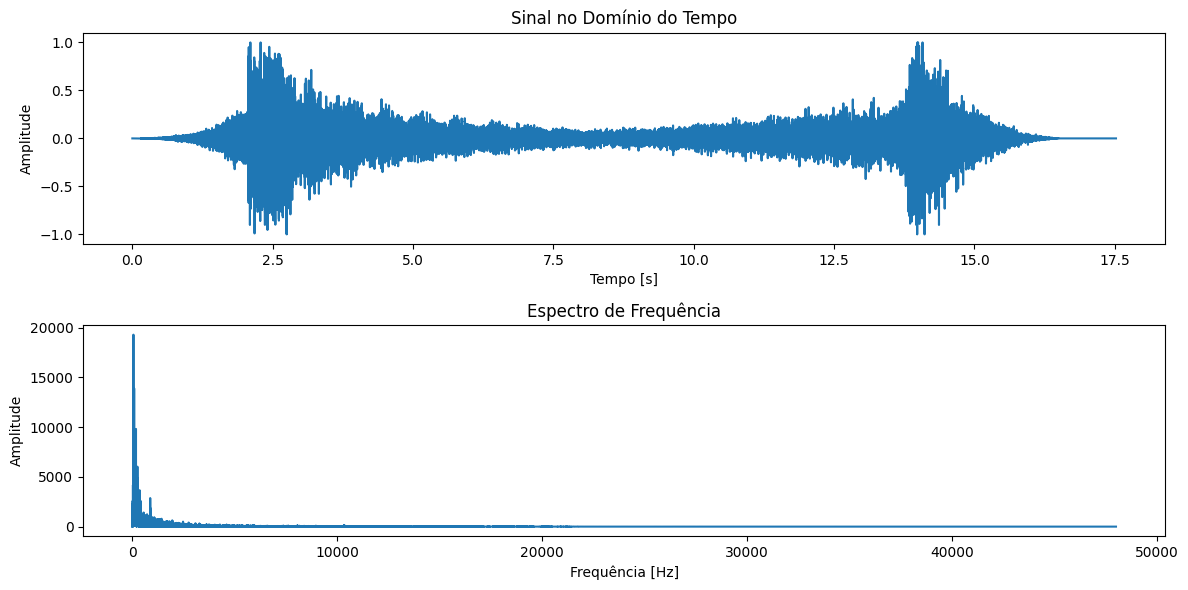

In [11]:
taxa_amostragem,dados_audio = wavfile.read('teste.wav')

if len(dados_audio.shape) > 1:
    dados_audio = dados_audio[:,0]

n = len(dados_audio)

fft_values = np.fft.fft(dados_audio) # armazenamento os valores da FFT do sinal de áudio
fft_freqs = np.fft.fftfreq(n,1/taxa_amostragem) # armazena as frequencias correspodentes

# Retira somente a parte positiva dos espectro de frequência
positive_freq = fft_freqs[:n//2]
positive_fft_values = np.abs(fft_values[:n//2])

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(np.linspace(0,n/taxa_amostragem,n),dados_audio)
plt.title('Sinal no Domínio do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freq, positive_fft_values)
plt.title('Espectro de Frequência')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_10964\1330021230.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  taxa_amostragem,dados_audio = wavfile.read('teste.wav')


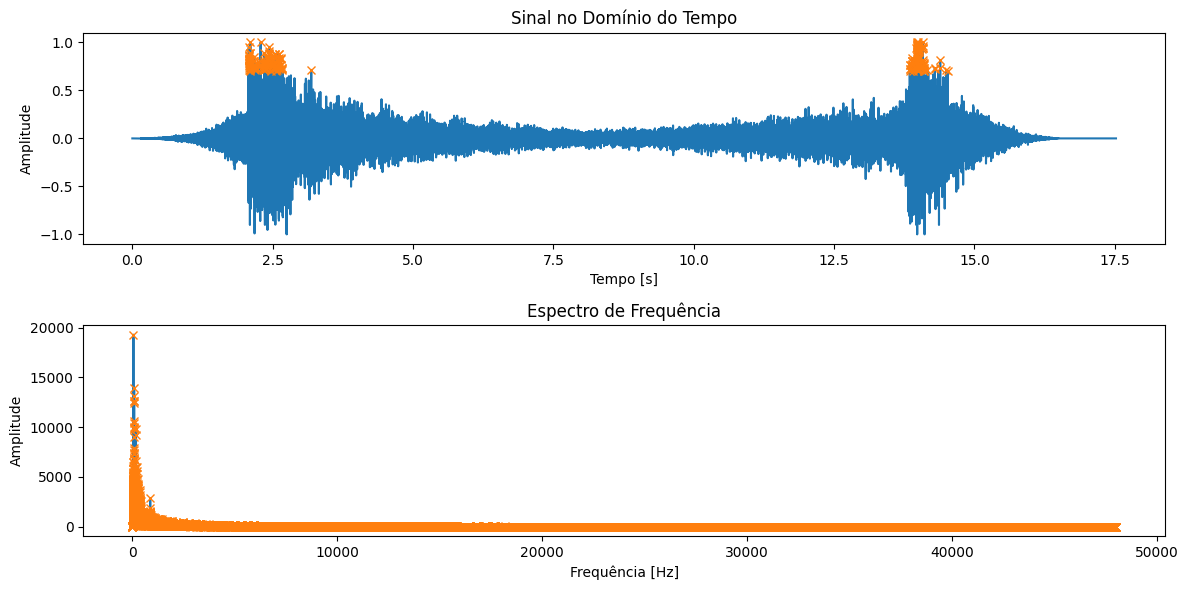

In [20]:
%reset -f
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
taxa_amostragem,dados_audio = wavfile.read('teste.wav')

if len(dados_audio.shape) > 1:
    dados_audio = dados_audio[:,0]

n = len(dados_audio)

fft_values = np.fft.fft(dados_audio) # armazenamento os valores da FFT do sinal de áudio
fft_freqs = np.fft.fftfreq(n,1/taxa_amostragem) # armazena as frequencias correspodentes

# Retira somente a parte positiva dos espectro de frequência
positive_freq = fft_freqs[:n//2]
positive_fft_values = np.abs(fft_values[:n//2])

peaks, _ = find_peaks(positive_fft_values, height=0)
time_peaks, _ = find_peaks(dados_audio, height=0.7)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(np.linspace(0,n/taxa_amostragem,n),dados_audio)
plt.plot(np.linspace(0,n/taxa_amostragem,n)[time_peaks],dados_audio[time_peaks],"x")
plt.title('Sinal no Domínio do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_freq, positive_fft_values)
plt.plot(positive_freq[peaks],positive_fft_values[peaks],"x")
plt.title('Espectro de Frequência')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()